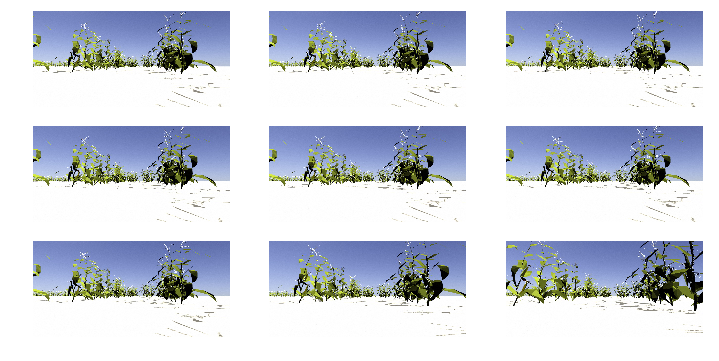

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# Visualizations will be shown inline
%matplotlib inline

sample_data_directory = 'data/IMG/'

S = np.ones((9, 800, 800, 3), dtype=np.uint8)

plt.rcParams['figure.figsize'] = (12, 6)

for i in range(9):
    image = mpimg.imread(sample_data_directory + "%d.jpg" % (i + 1))
    S[i] = image
    plt.subplot(3, 3, i+1)
    plt.imshow(image, aspect='auto')
    plt.axis('off')

Observations: 

The portion of the image above the horizon can be removed. Only the stalks and the curvature of the rows is important

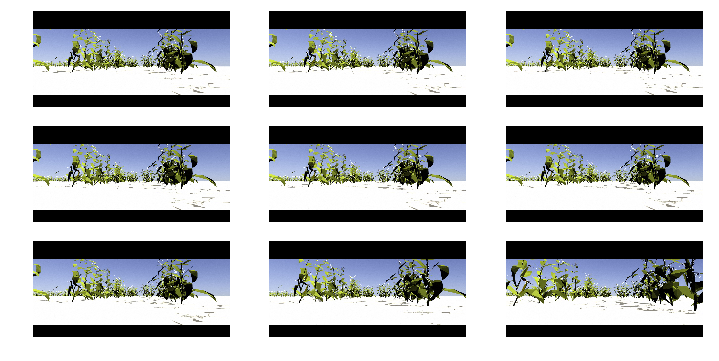

In [2]:
bottom_shave_pixels = 100
top_shave_pixels = 150

bonnet_pixels_start = 800 - bottom_shave_pixels
for i in range(9):
    S[i,bonnet_pixels_start:,:,:] = 0
    S[i,:top_shave_pixels,:,:] = 0
    image = S[i]
    plt.subplot(3, 3, i+1)
    plt.imshow(image, aspect='auto')
    plt.axis('off')

For the sake of simplicity these are made zero but in preprocessing the image would be resized. 

In [18]:
import pandas as pd

data_frame = pd.read_csv('data/driving_log.csv', usecols=[0,1,2])

data_frame.describe(include='all')

,image,time,steering
count,794,794.000000,794.000000
unique,794,NaN,NaN
top,data/IMG/313.jpg,NaN,NaN
freq,1,NaN,NaN
mean,NaN,223569.647355,0.066325
std,NaN,84498.613101,0.458077
min,NaN,75250.000000,-1.500000
25%,NaN,150987.500000,-0.038436
50%,NaN,224250.000000,0.000000
75%,NaN,297062.500000,0.221800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b40d5c0>]], dtype=object)

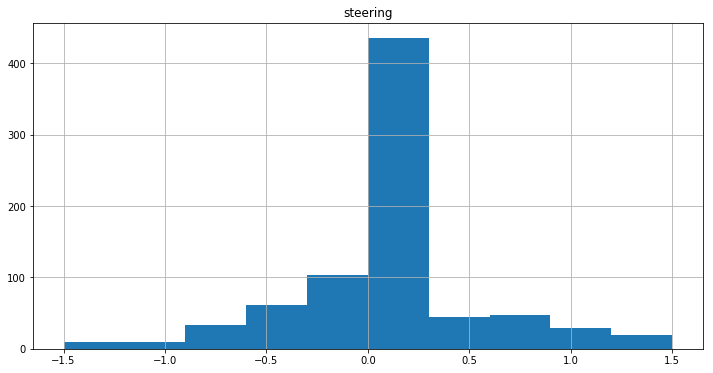

In [19]:
data_frame.hist(column='steering')

### Augmentation Techniques

In [20]:
import cv2

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

TARGET_SIZE = (64,64)

# def resize_to_target_size(image):
#     return cv2.resize(image, TARGET_SIZE) 
    
# def crop_and_resize(image):
#     cropped_image = image[55:135,:,:]
#     processed_image = resize_to_target_size(cropped_image)
#     return processed_image

def flip_image(image):
    return cv2.flip(image, 1)

def preprocess_image(image):
    image = crop_and_resize(image)
    image = image.astype(np.float32)
    image = image/255.0 - 0.5
    return image

Text(0.5,1,'Brightness Adjusted Image')

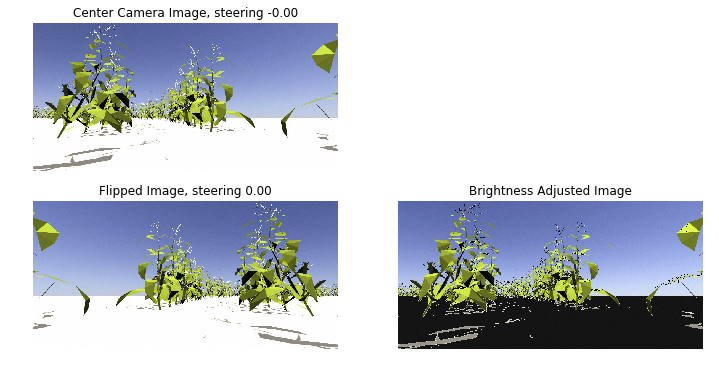

In [23]:
from keras.preprocessing.image import img_to_array, load_img

row = data_frame.iloc[100]
steering = row['steering']
image = load_img(row["image"].strip())
image = img_to_array(image).astype(np.uint8)

plt.subplot(2,2,1)
plt.imshow(image, aspect='auto')
plt.axis('off')
plt.title("Center Camera Image, steering %.2f" % steering)

plt.subplot(2,2,3)
plt.imshow(flip_image(image), aspect='auto')
plt.axis('off')
plt.title("Flipped Image, steering %.2f" % (-1.0*steering))

plt.subplot(2,2,4)
plt.imshow(augment_brightness_camera_images(image), aspect='auto')
plt.axis('off')
plt.title("Brightness Adjusted Image")